In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from numpy.random import multivariate_normal as mvnorm
from numpy.linalg import norm

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
%matplotlib inline

import pdb, time

seed = 0
np.random.seed(seed)

### Import and generate data

In [2]:
# Standardised Fama French 5 to industry portfolio 30
# Import data
data = pd.read_pickle("/Users/sikai/Downloads/ff5_30_standard_4000_draws.pkl")

# # Restrict to 100 time points
X = data[10:110].transpose(2, 1, 0)
X_cov = np.einsum('ijkl,jmkl->imkl', np.expand_dims(X, 1), np.expand_dims(X, 0))

### Train

In [3]:
n_dimensions, _, n_samples, time_steps = X_cov.shape
emp_inv = []
for i in range(time_steps):
    emp_inv.append(np.linalg.inv(np.mean(X_cov[:, :, :, i], 2)))
emp_inv = np.array(emp_inv)

In [80]:
from regain.covariance import TaylorEqualTimeGraphicalLasso, TimeGraphicalLasso
tic = time.perf_counter()
tgl_tp = TaylorEqualTimeGraphicalLasso(max_iter=10000, loss='LL', c_level=0.2, theta=0.5, rho=1e3, div=2, psi="laplacian")
emp_inv_score_tp, baseline_score_tp, fit_score_tp, pre_tp = tgl_tp.fit_cov(X_cov).eval_cov_pre() 
toc = time.perf_counter()
print('Running Time :{}'.format(toc - tic))
# min_pre_tp = np.amin(np.abs(pre_tp[pre_tp != 0]))

> /Users/sikai/Dropbox/Research/post_sum/code/regain/regain/covariance/taylor_prox_time_graphical_lasso.py(187)taylor_prox_time_graphical_lasso()
-> con_obj_mean = []
(Pdb) Z = Z_2 - Z_1
(Pdb) psi(Z[0])
0.6875258950442079
(Pdb) sum(map(psi, Z_2 - Z_1))
*** KeyboardInterrupt
(Pdb) q


BdbQuit: 

In [81]:
from regain.covariance import TaylorProxTimeGraphicalLasso, TimeGraphicalLasso
tic = time.perf_counter()
tgl_tp = TaylorProxTimeGraphicalLasso(max_iter=20000, loss='LL', c_level=0.2, rho=1e3, theta=0.5, tol=1e-4, rtol=1e-4, psi="laplacian")
emp_inv_score_tp, baseline_score_tp, fit_score_tp, pre_tp = tgl_tp.fit_cov(X_cov).eval_cov_pre() 
toc = time.perf_counter()
print('Running Time :{}'.format(toc - tic))
# min_pre_tp = np.amin(np.abs(pre_tp[pre_tp != 0]))

0
-6.883266595201455 -7.762712513025564
51013.43174175849
100
4.029665490179468e-11 -5.669475726574007
46995.341045933426
200
0.0021468053289666056 -4.185007353165803
43868.693567763
300
0.03578733821033531 -3.1704352958495927
41345.97346448181
400
0.0012595064556482072 -2.46625940885916
39259.32434583123
500
5.223229240147731e-05 -1.9541077221163723
37486.049142182594
600
3.5289261592907906e-06 -1.5947343294379974
35943.11598317106


/Users/sikai/.pyenv/versions/3.7.6/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


700
3.7270622037510748e-06 -1.3319003694878984
34573.13281159288
800
0.00011732882160586655 -1.1050249156596283
33335.79967616619
900
0.0001547758806665911 -0.910812375715924
32204.117997482463
1000
1.9133850416963583e-05 -0.7453740232099006
31157.536319244737
1100
0.0002575052342663753 -0.6030336633692772
30184.02309033721
1200
6.612277668516242e-05 -0.47728978750531736
29272.93005891753
1300
0.21647555982475986 -0.3714427770322553
28415.588145677397
1400
0.6562720294164368 -0.2743516873526909
27604.69128296607
1500
1.1307435760614855 -0.19292793423036458
26835.043210391195
1600
1.6248732260283152 -0.11153104673098531
26101.927484735348
1700
2.220683505596826 -0.045743952524351796
25404.62594879465
1800
3.53316089977442 0.019126250731996225
24740.147901577744
Rho Mult 2000.0 1821 0.032943319928813136 3.8882009339787844
1900
4.063405168076554 0.049908849160647736
24353.392162878226
Rho Mult 4000.0 1922 0.055052293561102646 4.143906272169386
2000
3.128934490624504 0.04273331794210686
24

13400
2.9761861571701775 0.0311685741842623
19018.235021188146
13500
2.9813254586501277 0.031218027061018762
18994.295015428575
13600
2.986565645460077 0.03126980580268361
18970.42744878112
13700
2.9918798073949535 0.03132153352824739
18946.622096590414
13800
2.997259548957908 0.0313735052398046
18922.886491745325
Rho Mult 32000.0 13841 0.031411338698084934 3.000080157884243
13900
2.984554157047109 0.031139516646686988
18906.31021802533
14000
2.9635020040850026 0.03084731942578701
18894.635044931314
14100
2.944284515162922 0.030582164198763754
18882.961963147798
14200
2.92610058132683 0.03032889976091889
18871.300241015004
14300
2.9085386916612013 0.03008376637487304
18859.65182738722
14400
2.891770117098824 0.02985389163138672
18848.01148694786
14500
2.875982430483761 0.029634004928441104
18836.38698796875
14600
2.860768079136479 0.0294180028352144
18824.78019025804
14700
2.8460352293993925 0.02920603823505546
18813.18799067489
14800
2.831607344290406 0.02899455373659871
18801.6125760

/Users/sikai/Dropbox/Research/post_sum/code/regain/regain/covariance/taylor_prox_time_graphical_lasso.py:366: UserWarning: Objective did not converge.
  warnings.warn("Objective did not converge.")


In [82]:
from regain.norm import l1_od_norm
from regain.validation import check_norm_prox
psi, prox_psi, psi_node_penalty = check_norm_prox(tgl_tp.psi)

def penalty_objective(Z_0, Z_1, Z_2, psi, theta):
    """Penalty-only objective function for time-varying graphical LASSO."""
    return theta * sum(map(l1_od_norm, Z_0)) + (1 - theta) * sum(map(psi, Z_2 - Z_1))

pre_tp_thres = {}
fit_score_tp_thres = {}
for i in [1e-4, 1e-6, 0]:
    pre_tp_thres[i] = np.array([k * (np.abs(k) >= i) for k in pre_tp])
    tgl_tp.precision_ = pre_tp_thres[i]
    emp_inv_score, baseline_score, fit_score_tp_thres[i], _ = tgl_tp.eval_cov_pre() 
    print(penalty_objective(pre_tp_thres[i], pre_tp_thres[i][:-1], pre_tp_thres[i][1:], psi, tgl_tp.theta))

18220.080216035287
18220.082215941577
18220.082218511976


In [67]:
np.save("tp_sol_ff5_ip30_10000_max_2_mult_2_l2.npy", pre_tp)

In [23]:
from regain.covariance import CVXInequalityTimeGraphicalLasso, TimeGraphicalLasso
pre_cvx = np.load("mosek_sol_ff5_30_standard_alpha_0.2.npy")

In [24]:
from regain.norm import l1_od_norm
from regain.validation import check_norm_prox
psi, prox_psi, psi_node_penalty = check_norm_prox(tgl_tp.psi)

def penalty_objective(Z_0, Z_1, Z_2, psi, theta):
    """Penalty-only objective function for time-varying graphical LASSO."""
    return theta * sum(map(l1_od_norm, Z_0)) + (1 - theta) * sum(map(psi, Z_2 - Z_1))

pre = {}
fit_score = {}
# for i in [1e-2, 1e-3, 1e-4, 1e-6]:
for i in [1e-4]:
    pre[i] = np.array([k * (np.abs(k) >= i) for k in pre_cvx])
    tgl_tp.precision_ = pre[i]
    emp_inv_score, baseline_score, fit_score[i], _ = tgl_tp.eval_cov_pre() 
    print(penalty_objective(pre[i], pre[i][:-1], pre[i][1:], psi, tgl_tp.theta))

5951.380304945549


In [59]:
tgl = TimeGraphicalLasso(alpha=1., beta=1., mode='admm', rho=1, tol=1e-4,
            rtol=1e-4, psi='laplacian', max_iter=3000, verbose=False, assume_centered=False, 
            return_history=False, update_rho_options=None, compute_objective=True, 
            stop_at=None, stop_when=1e-4, suppress_warn_list=False, init='empirical')
fit_score_, pre_ = tgl.fit_cov(X_cov).eval_cov_pre()   

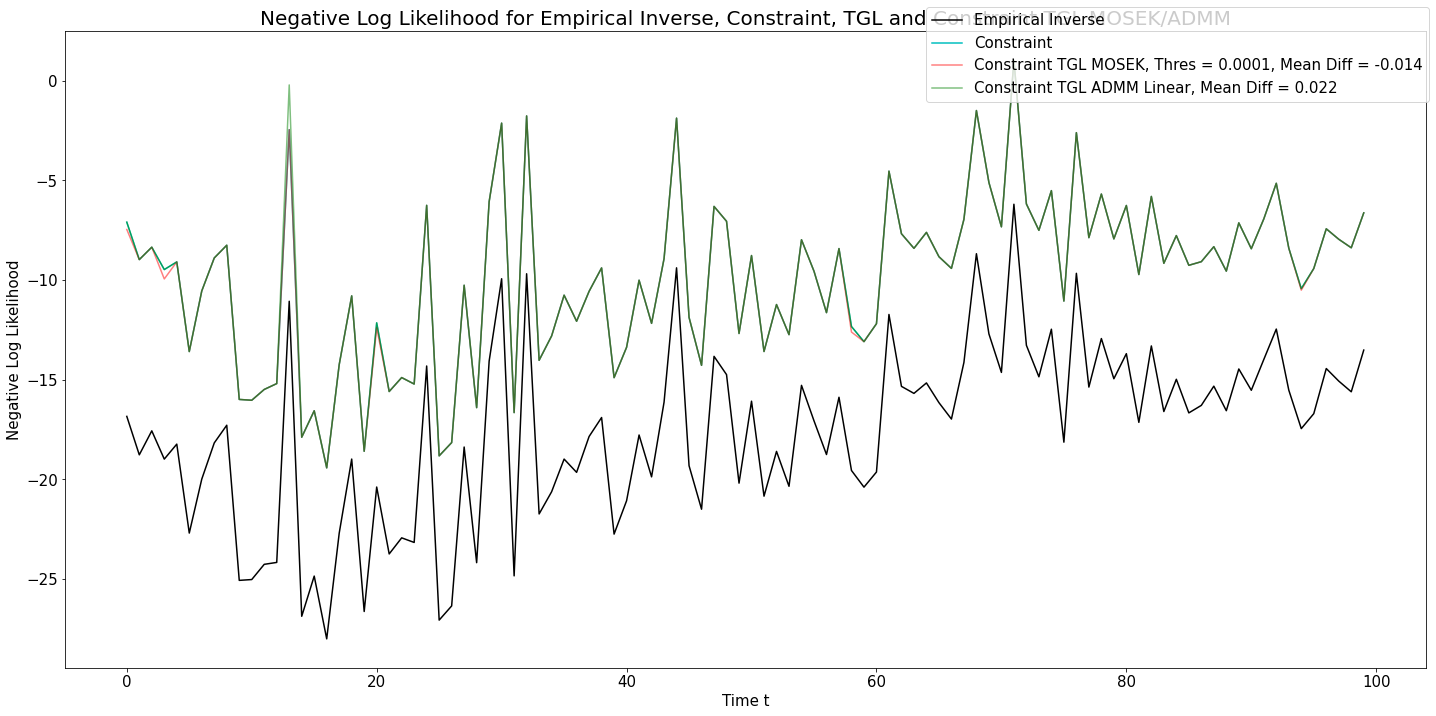

In [83]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgb"
color_index = 0
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

ax.plot(range(X_cov.shape[-1]), emp_inv_score_tp, color='k', label=r'Empirical Inverse')
ax.plot(range(X_cov.shape[-1]), baseline_score_tp, color='c', label=r'Constraint')
for i in [1e-4]:
    mean_diff = np.mean(np.array(fit_score[i]) - baseline_score)
    ax.plot(range(X_cov.shape[-1]), fit_score[i], color='r', alpha=0.5, 
#     ax.plot(range(X_cov.shape[-1]), fit_score[i], color=colors[color_index], alpha=0.5, 
            label=r'Constraint TGL MOSEK, Thres = {}, Mean Diff = {:.3f}'.format(i, mean_diff))
    color_index += 1
# mean_diff = np.mean(np.array(fit_score_grad) - baseline_score_grad)
# ax.plot(range(X_cov.shape[-1]), fit_score_grad, alpha=0.5, color='m',
#         label=r'Constraint TGL ADMM Gradient, Mean Diff = {:.3f}'.format(mean_diff))
# mean_diff = np.mean(np.array(fit_score_tp) - baseline_score_tp)
mean_diff = np.mean(np.array(fit_score_tp_thres[1e-4]) - baseline_score_tp)
# ax.plot(range(X_cov.shape[-1]), fit_score_tp, alpha=0.5, color='g',
ax.plot(range(X_cov.shape[-1]), fit_score_tp_thres[1e-4], alpha=0.5, color='g',
        label=r'Constraint TGL ADMM Linear, Mean Diff = {:.3f}'.format(mean_diff))
# mean_diff = np.mean(np.array(fit_score_) - res[1][1])
# ax.plot(range(X_cov.shape[-1]), fit_score_, color='y', label=r'Vanilla TGL, Mean Diff = {:.3f}'.format(mean_diff))

fig.legend(fontsize=15)
ax.set_ylabel('Negative Log Likelihood', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Time t', fontsize=15)
ax.set_title(r'Negative Log Likelihood for Empirical Inverse, Constraint, TGL and Constraint TGL MOSEK/ADMM', fontsize=20)
plt.tight_layout()
# plt.savefig('ff5_ip30_40000_diff_like_max_2_mult_3_div_5.pdf')

In [84]:
np.log(np.array(fit_score_tp_thres[1e-4]) - baseline_score_tp)

/Users/sikai/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/sikai/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([-29.12792994,          nan, -15.78885425, -23.69795794,
       -11.28525978,          nan, -10.22519287, -27.61332613,
                nan, -24.68883308,          nan, -10.43867793,
       -26.79640266,   0.80783465, -30.87316939, -15.26582398,
       -27.35217081, -27.55075289, -33.96421185,         -inf,
       -33.27106467,          nan,          nan,          nan,
                nan,          nan, -28.4507831 , -29.58218521,
       -12.73257956,          nan, -12.90872025, -11.00926899,
       -15.34683027, -28.30822004, -28.80515655, -15.86706041,
       -27.87064208, -10.61077024, -29.78982458, -28.96026554,
                nan,          nan, -25.23416789, -29.39986366,
                nan, -10.80713921,          nan, -10.22693659,
       -11.23299669,          nan,          nan, -28.4711504 ,
       -32.17245238,          nan,          nan,          nan,
                nan,          nan, -26.68627327, -23.16027843,
       -25.44982258, -31.61283659,          nan,  -9.03

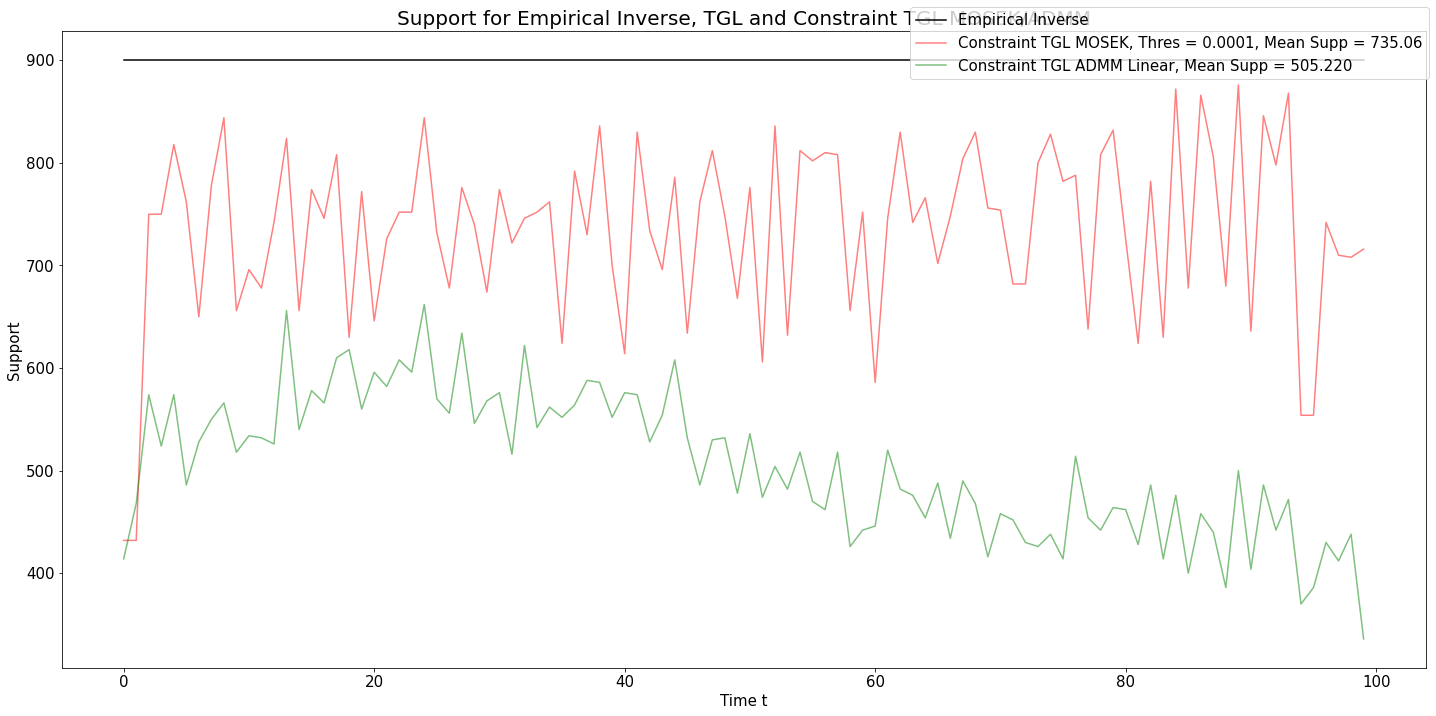

In [85]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgb"
color_index = 0

ax.plot(range(X_cov.shape[-1]), [sum(sum(abs(emp_inv[k]) > 0)) for k in range(X_cov.shape[-1])], 
        color='k', label=r'Empirical Inverse')
# for i in [min_pre_tp]:
for i in [1e-4]:
    supp = [sum(sum(abs(pre[i][t]) > 0)) for t in range(X_cov.shape[-1])]
    mean_supp = np.mean(supp)
    ax.plot(range(X_cov.shape[-1]), supp, color='r', alpha=0.5, 
#     ax.plot(range(X_cov.shape[-1]), supp, color=colors[color_index], alpha=0.5, 
            label=r'Constraint TGL MOSEK, Thres = {}, Mean Supp = {}'.format(i, mean_supp))
    color_index += 1
# supp = [sum(sum(abs(pre_grad[t]) > 0)) for t in range(X_cov.shape[-1])]
# ax.plot(range(X_cov.shape[-1]), supp, color='m', alpha=0.5,
#         label=r'Constraint TGL ADMM Gradient, Mean Supp = {:.3f}'.format(np.mean(supp)))
supp = [sum(sum(abs(pre_tp_thres[1e-4][t]) > 0)) for t in range(X_cov.shape[-1])]
# supp = [sum(sum(abs(pre_tp[t]) > 0)) for t in range(X_cov.shape[-1])]
ax.plot(range(X_cov.shape[-1]), supp, color='g', alpha=0.5,
        label=r'Constraint TGL ADMM Linear, Mean Supp = {:.3f}'.format(np.mean(supp)))
# supp = [sum(sum(abs(pre_[t]) > 0)) for t in range(X_cov.shape[-1])]
# ax.plot(range(X_cov.shape[-1]), [sum(sum(abs(pre_[k]) > 0)) for k in range(X_cov.shape[-1])], 
#         color='y', label=r'Vanilla TGL, , Mean Supp = {:.3f}'.format(np.mean(supp)))


fig.legend(fontsize=15)
ax.set_ylabel('Support', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Time t', fontsize=15)
ax.set_title(r'Support for Empirical Inverse, TGL and Constraint TGL MOSEK/ADMM', fontsize=20)
plt.tight_layout()
# plt.savefig('ff5_ip30_40000_diff_supp_max_2_mult_3_div_5.pdf')

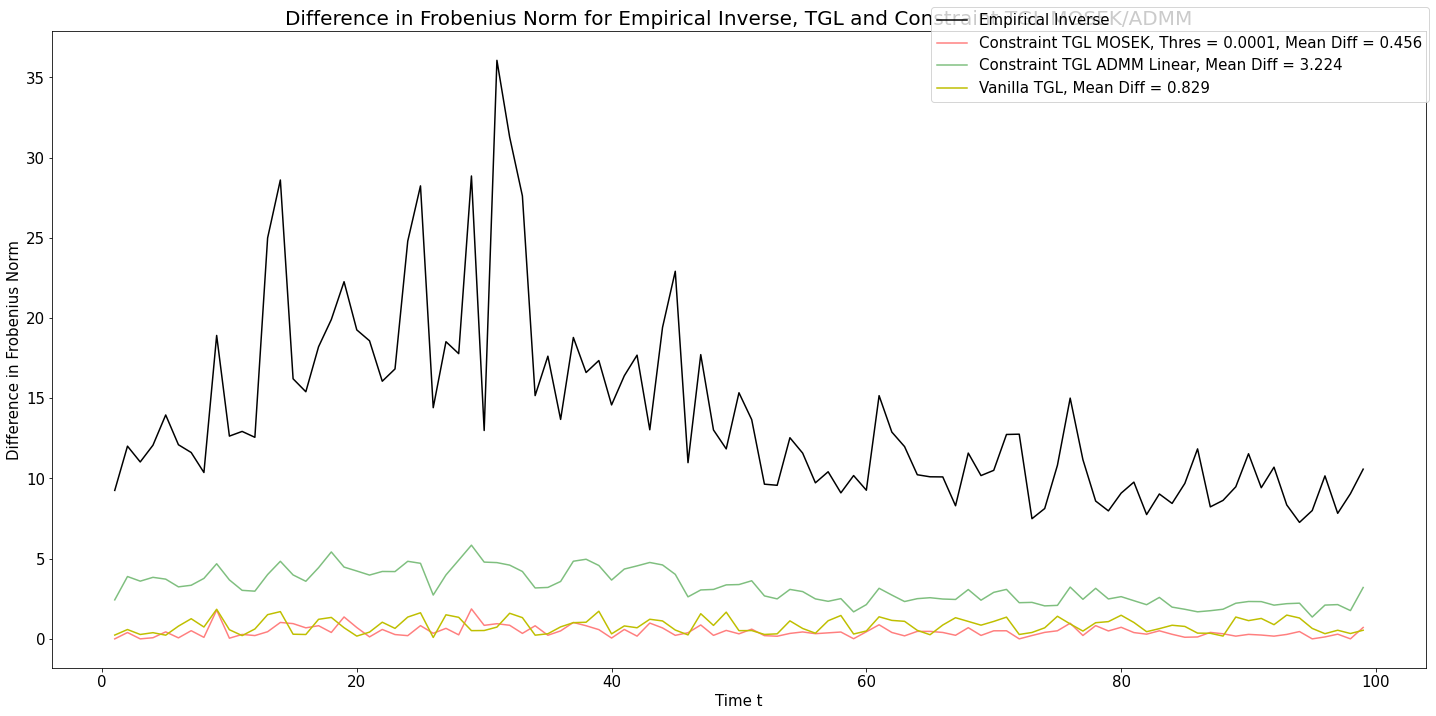

In [86]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgb"
color_index = 0

diff_emp = [norm(emp_inv[t] - emp_inv[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
ax.plot(range(1, X_cov.shape[-1]), np.array(diff_emp), alpha=1, color='k', label=r'Empirical Inverse')
# for i in [min_pre_tp]:
for i in [1e-4]:
    diff = [norm(pre[i][t] - pre[i][t-1], 'fro') for t in range(1, X_cov.shape[-1])]
    mean_diff = np.mean(diff)
    ax.plot(range(1, X_cov.shape[-1]), diff, color='r', alpha=0.5, 
#     ax.plot(range(1, X_cov.shape[-1]), diff, color=colors[color_index], alpha=0.5, 
            label=r'Constraint TGL MOSEK, Thres = {}, Mean Diff = {:.3f}'.format(i, mean_diff))
    color_index += 1
# diff_grad = [norm(pre_grad[t] - pre_grad[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
# ax.plot(range(1, X_cov.shape[-1]), diff_grad, color='m', alpha=0.5,
#         label=r'Constraint TGL ADMM Gradient, Mean Diff = {:.3f}'.format(np.mean(diff_grad)))
diff_grad = [norm(pre_tp_thres[1e-4][t] - pre_tp_thres[1e-4][t-1], 'fro') for t in range(1, X_cov.shape[-1])]
# diff_grad = [norm(pre_tp[t] - pre_tp[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
ax.plot(range(1, X_cov.shape[-1]), diff_grad, color='g', alpha=0.5,
        label=r'Constraint TGL ADMM Linear, Mean Diff = {:.3f}'.format(np.mean(diff_grad)))
diff_fit_ = [norm(pre_[t] - pre_[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
ax.plot(range(1, X_cov.shape[-1]), np.array(diff_fit_), color='y', alpha=1, 
        label=r'Vanilla TGL, Mean Diff = {:.3f}'.format(np.mean(diff_fit_)))

fig.legend(fontsize=15)
ax.set_ylabel('Difference in Frobenius Norm', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Time t', fontsize=15)
ax.set_title(r'Difference in Frobenius Norm for Empirical Inverse, TGL and Constraint TGL MOSEK/ADMM', fontsize=20)
plt.tight_layout()
# plt.savefig('ff5_ip30_40000_diff_fro_max_2_mult_3_div_5.pdf')